In [2]:
!pip install pandas-datareader

In [148]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [8]:
start = '2010-01-01'
end = '2020-12-31'

In [13]:
df = pdr.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573936
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [14]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573936
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


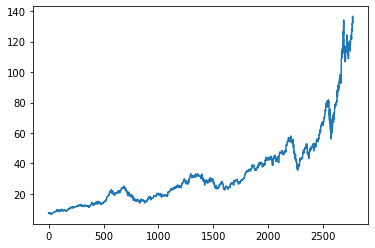

In [15]:
plt.plot(df['Close'])

In [17]:
M100 = df['Close'].rolling(100).mean()
M200 = df['Close'].rolling(200).mean()

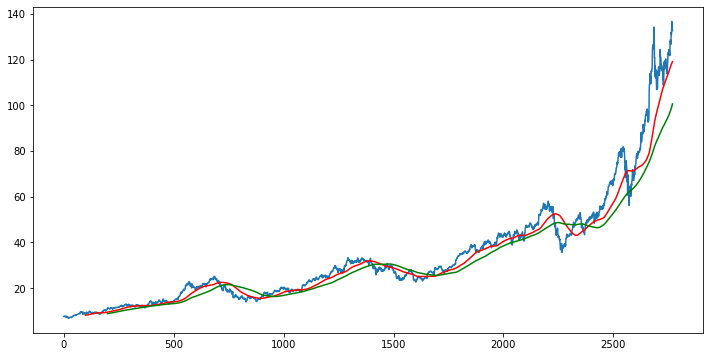

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(M100, 'r')
plt.plot(M200, 'g')


In [23]:
df.shape

(2770, 7)

In [24]:
# Spliting data into training and testing

data_training = pd.DataFrame(df['Close'][:int(len(df)*.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*.70):])

In [26]:
len(data_training), len(data_testing), len(data_training) + len(data_testing)

(1938, 832, 2770)

In [28]:
data_training.tail()

,Close
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000
1937,40.215000


In [29]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [31]:
# Scaling in between 0-1

scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_testing_array = scaler.fit_transform(data_testing)

In [36]:
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [37]:
data_training_array.shape

(1938, 1)

In [51]:
X_train = []
y_train = []

for i in range(100, len(data_training_array)):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[[0.01953359],
         [0.02296349],
         [0.0233504 ],
         ...,
         [0.05256719],
         [0.05721005],
         [0.0555997 ]],
 
        [[0.02296349],
         [0.0233504 ],
         [0.01978458],
         ...,
         [0.05721005],
         [0.0555997 ],
         [0.05443896]],
 
        [[0.0233504 ],
         [0.01978458],
         [0.01937673],
         ...,
         [0.0555997 ],
         [0.05443896],
         [0.0641012 ]],
 
        ...,
 
        [[0.83274073],
         [0.82893436],
         [0.84181742],
         ...,
         [0.98557983],
         [0.98433546],
         [0.97957748]],
 
        [[0.82893436],
         [0.84181742],
         [0.84057305],
         ...,
         [0.98433546],
         [0.97957748],
         [0.96032627]],
 
        [[0.84181742],
         [0.84057305],
         [0.85060125],
         ...,
         [0.97957748],
         [0.96032627],
         [0.98133429]]]),
 array([0.05443896, 0.0641012 , 0.06779252, ..., 0.9603

In [52]:
X_train.shape

(1838, 100, 1)

In [41]:
!pip install keras

In [43]:
!pip install tensorflow

  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Processing c:\users\kalim\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
Processing c:\users\kalim\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30710 sha256=4b14885b7ce4

In [166]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, 
              input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [167]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 60)           26640     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100, 60)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 120)              

In [168]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
58/58 [==============================] - 24s 269ms/step - loss: 0.0381
Epoch 2/30
58/58 [==============================] - 19s 331ms/step - loss: 0.0083
Epoch 3/30
58/58 [==============================] - 17s 295ms/step - loss: 0.0070
Epoch 4/30
58/58 [==============================] - 16s 275ms/step - loss: 0.0077
Epoch 5/30
58/58 [==============================] - 15s 261ms/step - loss: 0.0076
Epoch 6/30
58/58 [==============================] - 15s 264ms/step - loss: 0.0059
Epoch 7/30
58/58 [==============================] - 16s 269ms/step - loss: 0.0057
Epoch 8/30
58/58 [==============================] - 15s 265ms/step - loss: 0.0063
Epoch 9/30
58/58 [==============================] - 16s 268ms/step - loss: 0.0053
Epoch 10/30
58/58 [==============================] - 16s 267ms/step - loss: 0.0056
Epoch 11/30
58/58 [==============================] - 16s 268ms/step - loss: 0.0046
Epoch 12/30
58/58 [==============================] - 15s 267ms/step - loss: 0.0048
Epoch 13/30
5

In [169]:
model.save('stock_trend_prediction_model.h5')

In [126]:
data_testing

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499
...,...
2765,131.970001
2766,136.690002
2767,134.869995
2768,133.720001


In [176]:
past_100_days = data_training.tail(100)

In [177]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [178]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(932, 1)

In [180]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])    

In [192]:
y_test.shape

(832,)

In [182]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((832, 100, 1), (832,))

In [183]:
y_predict = model.predict(X_test)

In [184]:
y_predict.shape

(832, 1)

In [185]:
y_predict

array([[0.09035611],
       [0.09056324],
       [0.09075618],
       [0.09093353],
       [0.09109419],
       [0.09123739],
       [0.09136156],
       [0.09146404],
       [0.09154163],
       [0.09159105],
       [0.09161092],
       [0.09160188],
       [0.09156526],
       [0.09150361],
       [0.09141991],
       [0.09131768],
       [0.09120013],
       [0.09107122],
       [0.09093484],
       [0.09079492],
       [0.09065492],
       [0.09051819],
       [0.09038727],
       [0.09026456],
       [0.09015328],
       [0.09005675],
       [0.0899774 ],
       [0.08991493],
       [0.08986802],
       [0.08983451],
       [0.08981261],
       [0.08980013],
       [0.08979559],
       [0.08980031],
       [0.08981863],
       [0.08985706],
       [0.08992013],
       [0.09001164],
       [0.090138  ],
       [0.09030804],
       [0.09053028],
       [0.09081341],
       [0.09116316],
       [0.09157965],
       [0.09205794],
       [0.09258589],
       [0.09314652],
       [0.093

In [187]:
scaler.scale_

array([0.00988704])

In [188]:
scaler_factor = 1/scaler.scale_
y_predict *= scaler_factor
y_test *= scaler_factor

In [189]:
y_predict

array([[ 9.138844 ],
       [ 9.159793 ],
       [ 9.179307 ],
       [ 9.197245 ],
       [ 9.213494 ],
       [ 9.227978 ],
       [ 9.240537 ],
       [ 9.250902 ],
       [ 9.258749 ],
       [ 9.263747 ],
       [ 9.265758 ],
       [ 9.264843 ],
       [ 9.261139 ],
       [ 9.254905 ],
       [ 9.246438 ],
       [ 9.236099 ],
       [ 9.224209 ],
       [ 9.211171 ],
       [ 9.197377 ],
       [ 9.183226 ],
       [ 9.169065 ],
       [ 9.155236 ],
       [ 9.141994 ],
       [ 9.129583 ],
       [ 9.118328 ],
       [ 9.108564 ],
       [ 9.100539 ],
       [ 9.094221 ],
       [ 9.089477 ],
       [ 9.086087 ],
       [ 9.083872 ],
       [ 9.08261  ],
       [ 9.08215  ],
       [ 9.082628 ],
       [ 9.08448  ],
       [ 9.088367 ],
       [ 9.094748 ],
       [ 9.104003 ],
       [ 9.116783 ],
       [ 9.133981 ],
       [ 9.156459 ],
       [ 9.185096 ],
       [ 9.220469 ],
       [ 9.262594 ],
       [ 9.31097  ],
       [ 9.364368 ],
       [ 9.421072 ],
       [ 9.47

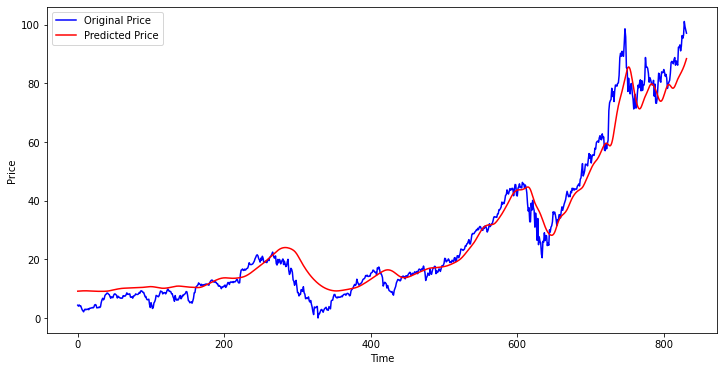

In [191]:
# on 30 epoch training model
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()